In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict

In [2]:
leki = pd.read_excel('dane_leki.xlsx')
leki.columns = ['numer',
 'Nazwa',
 'logK HSA',
 'logKCTAB',
 'CATS3D_00_DD',
 'CATS3D_09_AL',
 'CATS3D_00_AA',
 'Zbiór']
leki_do_macierzy = leki.drop(columns=['numer', 'Nazwa', 'logK HSA', 'Zbiór'])

In [3]:
corr_matrix = leki_do_macierzy.corr()

In [4]:
trening = leki[leki['Zbiór'] == 't']
valid = leki[leki['Zbiór'] == 'w']

In [5]:
X_trening = trening[['logKCTAB',
 'CATS3D_00_DD',
 'CATS3D_09_AL',
 'CATS3D_00_AA']]
y_trening = trening[['logK HSA']]

X_valid = valid[['logKCTAB',
 'CATS3D_00_DD',
 'CATS3D_09_AL',
 'CATS3D_00_AA']]
y_valid = valid[['logK HSA']]

In [6]:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X_trening, y_trening)

LinearRegression()

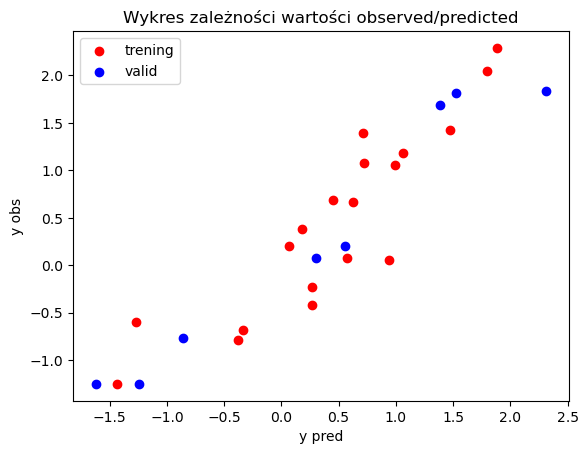

In [43]:
x1 = regr.predict(X_trening)
y1 = trening['logK HSA']
x2 = regr.predict(X_valid)
y2 = valid['logK HSA']
plt.scatter(x1, y1, label="trening", color="red")
plt.scatter(x2, y2, label="valid", color="blue")
plt.xlabel('y pred')
plt.ylabel('y obs')
plt.legend()
plt.title("Wykres zależności wartości observed/predicted")
plt.show()

In [8]:
h_i_trening = pd.Series((X_trening.iloc[i,:]).T @ np.linalg.inv(X_trening.T @ X_trening) @ X_trening.iloc[i,:] for i in range(X_trening.shape[0]))
h_i_valid = pd.Series((X_valid.iloc[i,:]).T @ np.linalg.inv(X_valid.T @ X_valid) @ X_valid.iloc[i,:] for i in range(X_valid.shape[0]))

In [9]:
x1 = pd.Series(x1[:,0])
x2 = pd.Series(x2[:,0])


In [10]:
residual_trening = pd.Series(y1[i]-x1[i] for i in range(X_trening.shape[0]))
residual_trening_stan = (residual_trening - residual_trening.mean())/residual_trening.std()
residual_valid = pd.Series(y2.iloc[i]-x2[i] for i in range(X_valid.shape[0]))
residual_valid_stan = (residual_valid - residual_valid.mean())/residual_valid.std()

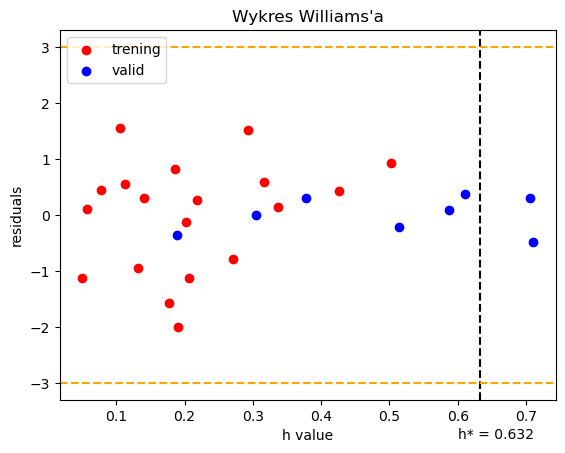

In [11]:
h_star = (3*X_trening.shape[1])/X_trening.shape[0]
h_star = np.round(h_star, decimals=3)
plt.scatter(h_i_trening, residual_trening_stan, label="trening", color="red")
plt.scatter(h_i_valid, residual_valid, label="valid", color="blue")
plt.axvline(x = h_star, linestyle ="--",
            color ='black') 
plt.text(0.6,-4,f'h* = {h_star}')
plt.axhline(y=3, linestyle ="--",
            color ='orange')
plt.axhline(y=-3, linestyle ="--",
            color ='orange')
plt.ylim = ([4, -4])
plt.xlabel('h value')
plt.ylabel('residuals')
plt.legend()
plt.title("Wykres Williams'a")
plt.show()

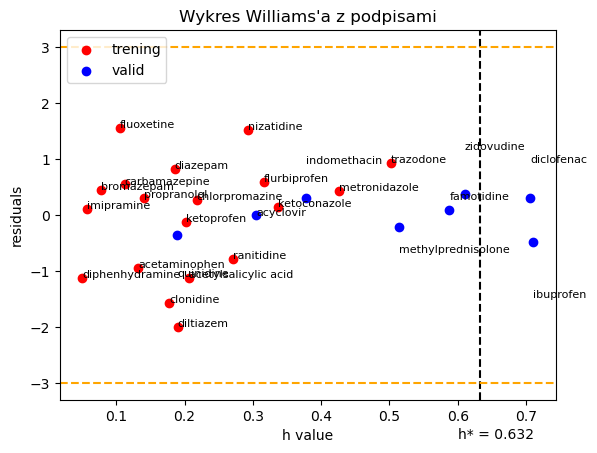

In [42]:
h_star = (3*X_trening.shape[1])/X_trening.shape[0]
h_star = np.round(h_star, decimals=3)
n = trening['Nazwa']
fig, ax = plt.subplots()
ax.scatter(h_i_trening, residual_trening_stan, label="trening", color="red")

for i, txt in enumerate(n):
    ax.annotate(txt, (h_i_trening[i], residual_trening_stan[i]), size=8)
n2 = valid['Nazwa']
ax.scatter(h_i_valid, residual_valid, label="valid", color="blue")
for i, txt in enumerate(n2):
    ax.annotate(txt, (h_i_valid[i], residual_valid_stan[i]), size=8)
plt.axvline(x = h_star, linestyle ="--",
            color ='black') 
plt.text(0.6,-4,f'h* = {h_star}')
plt.axhline(y=3, linestyle ="--",
            color ='orange')
plt.axhline(y=-3, linestyle ="--",
            color ='orange')
plt.ylim = ([4, -4])
plt.xlabel('h value')
plt.ylabel('residuals')
plt.legend()
plt.title("Wykres Williams'a z podpisami")
plt.show()

In [ ]:
#INTERPRETACJA WYNIKÓW - diclofenac oraz ibuprofen nie są w dziedzinie modelu, więc przewidywania dla ich wartości nie są wiarygodne

In [23]:
b1 = regr.coef_[0][0]
b2 = regr.coef_[0][1]
b3 = regr.coef_[0][2]
b4 = regr.coef_[0][3]
equation = pd.Series(regr.intercept_ + b1*X_trening['logKCTAB'][i] + b2*X_trening['CATS3D_00_DD'][i] + b3*X_trening['CATS3D_09_AL'][i] + b4*X_trening['CATS3D_00_AA'][i] for i in range(X_trening.shape[0]))

In [14]:
R2 = regr.score(X_trening, y_trening)

0.802627713030591

In [28]:
RMSEc = np.sqrt((((regr.predict(X_trening) - y_trening)**2).sum())/X_trening.shape[0]).iloc[0]

In [ ]:
loo = LeaveOneOut()
scores = cross_val_predict(regr, X_trening, y_trening, cv=loo, n_jobs=-1)

In [38]:
Q2cv = (1 - (((scores - y_trening))**2).sum()/((y_trening - y_trening.mean())**2).sum()).iloc[0]

In [30]:
RMSEcv2 = np.sqrt((((scores - y_trening)**2).sum())/(X_trening.shape[0])).iloc[0]

In [36]:
Q2ex = (1 - (((y_valid - regr.predict(X_valid)))**2).sum()/((y_valid - y_valid.mean())**2).sum()).iloc[0]

In [33]:
RMSEex = np.sqrt((((regr.predict(X_valid) - y_valid)**2).sum())/X_valid.shape[0]).iloc[0]

In [34]:
S2m = (((regr.predict(leki_do_macierzy) - regr.predict(leki_do_macierzy).mean())**2).sum())/(leki.shape[0] - 1)
S2e = (((leki['logK HSA'] - regr.predict(leki_do_macierzy).reshape(-1))**2).sum())/(leki.shape[0] - 5)
F = S2m/S2e

In [41]:
print(f'R2 = {R2},\nRMSEc = {RMSEc},\nQ2cv = {Q2cv},\nRMSEcv = {RMSEcv2},\nQ2ex = {Q2ex},\nRMSEex = {RMSEex},\nF-Snedecor = {F}')

R2 = 0.802627713030591,
RMSEc = 0.4271069242787428,
Q2cv = 0.6223963031006663,
RMSEcv = 0.5907607652603648,
Q2ex = 0.9424397769734012,
RMSEex = 0.301358724588806,
F-Snedecor = 5.7467999205176845


In [ ]:
#INTERPRETACJA WYNIKÓW 
# wartość R2 wynosi ponad 0.8, więc model wyjaśnia ponad 80% zmienności dla wybranych związków
# średni kwadratowy błąd kalibracji w 3 przypadkach jest mniejszy niż 1 co pozwala wnioskować, że model jest dobrze skonstruowany
# Q2ex wynosi ponad 0.94, co oznacza że model w 94% poprawnie przewiduje wartości dla innych związków
# wartość Q2cv jest dość niska, więc model nie jest super elastyczny, ale przeszedł pozytywnie wewnętrzną walidację
